# 機械学習Sprint1　3日間
### 10/30（火）,10/31（水）,11/2（金）  
**課題：**  
**☆kaggleにsubmitする**   
**☆kernelをリサーチする**  

遠藤メンターから提示された手順  
①問題提起を理解する　→分類問題であることを確認。  
    ・返済できない人を「１」、返済できる人を「０」の分類する。  
②評価指標を理解する　→ROCである。  
    ・ほぼ全てのデータが「０」なので、それをうまく評価できるようにする必要がある  
③PublicとPrivateの比率を確認する。今回はPublic20,Private８０。  
④EDAする  
⑤first Submissionする  
⑥first CV schemaを作る（K-holdなど）　  
⑦前処理する  
⑧CVする（Grid SearchCVもなおよし）  
⑨Trainingする　モデル（決定木：logistic,lgbmなど）  
⑩Submissionする  

## 実際のところ
sprint1を開始する時点ではEDAすることも出来ず（やり方が分からない）、CV(cross validation)を作ることも出来ない状態であった。そもそもCVを理解していなかったです。そのため最初の2日間はカリキュラムのAI教師あり学習入門編にあるコードを何度も写経をして見ないで書けるようにした。そのあとに、kaggleのCome Creditのカーネルで一番投票されている以下のカーネルをすべて写経して、submissionするところをゴールにしました。  
https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

CVはsklearnのKFoldを使用しています。  

In [1]:
## ライブラリのインポート
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
import os

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## データのロード
app_train = pd.read_csv("application_train.csv")

In [3]:
## シェイプを確認
print("Training data shape:  ", app_train.shape)
app_train.head()

Training data shape:   (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
## テストデータのロード
app_test = pd.read_csv('application_test.csv')
print("Testing data shape:  ", app_test.shape)
app_test.head()

Testing data shape:   (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
## ターゲット項目の値毎のカウント
## value_countsはユニークな要素の値がindex、その出現個数がdataとなる
app_train["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [6]:
## 合計を取得
app_train["TARGET"].value_counts().sum()

307511

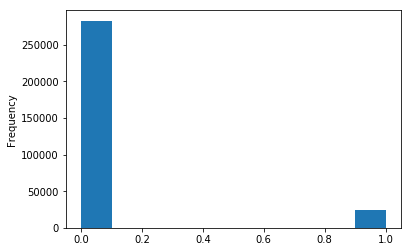

In [7]:
## Pandas.DataFrame.plot()  Pandas Plot と呼ばれるものです。
app_train["TARGET"].astype(int).plot.hist()
plt.show()

### Examine Missing Values
### 欠損値を調べる

In [8]:
## 欠損値関数を作成する
def missing_values_table(df):
    # pandas.DataFrameおよびpandas.Seriesにはisnull()メソッドが用意されている。
    # 各要素に対して判定を行い、欠損値NaNであればTrue、欠損値でなければFalseとする。
    # 元のオブジェクトと同じサイズ（行数・列数）のオブジェクトを返す。
    # isnull()は各要素がNaNかどうかを判定するメソッド
    # sum()でそのNaNの個数をカウント
    mis_val = df.isnull().sum()
    
    # NaNの個数をデータの件数で割ってあげると、そのカラムにつき、どの程度の割合で欠損値NaNが含まれているかが分かる
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # pd.concatは複数テーブルを縦方向に連結することができる。axis=1を指定すると、横方向に連結することができる
    # 今回の結果は２列の表が出来上がる
    mis_val_table = pd.concat([mis_val, mis_val_percent],axis=1)
    
    # カラム名をつけてあげる
    # カラムをつけないと、0,1とindex値となっているのでぱっと見分かりずらい
    mis_val_table_ren_columns = mis_val_table.rename(columns={0 : "Missing Values", 1 : "% of Total Values"})
    
    # Sort the table by precentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    "% of Total Values", ascending=False).round(1)
    
    #Print same summary information
    print("Your selected dataframe has  " + str(df.shape[1]) + " columns.\n"
         "There are " + str(mis_val_table_ren_columns.shape[0]) +
         " columns that have missing values.")
    
    # Return the dataframe with missing infomation
    return mis_val_table_ren_columns    

In [9]:
# 欠損値関数を利用してみる
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has  122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


### Column Types
カラムの種類

In [10]:
# カラムのデータ型を確認する
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [11]:
# Number of unique classes in each object column
app_train.select_dtypes("object").apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Encoding Categorical Variables
### カテゴリ変数のエンコーディング.符号化。文字型を数字型に変換する。

In [12]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
#カラムを繰り返す
for col in app_train:
    if app_train[col].dtype == "object":
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1

print("%d columns were label encoded." % le_count)

3 columns were label encoded.


In [13]:
# one-hot encoding of categorical variables
# カテゴリカル変数のワンホット変換　
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print("Training Features shape: ", app_train.shape)
print("Testing Features shape: ", app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


### Aligning Training and Testing Data
### トレーニングデータとテストデータの整列

In [14]:
train_labels = app_train["TARGET"]

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = "inner", axis=1)

# Add the target back in
app_train["TARGET"] = train_labels

print("Training Features shape: ", app_train.shape)
print("Testing Features shape: ", app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


### Back to Exploratory Data Analysis
### 探索的データ分析に戻る

In [15]:
(app_train["DAYS_BIRTH"] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [16]:
app_train["DAYS_EMPLOYED"].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5,0,'Days Employment')

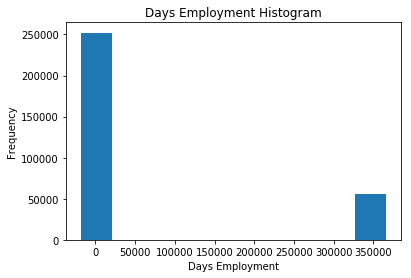

In [17]:
app_train["DAYS_EMPLOYED"].plot.hist(title="Days Employment Histogram");
plt.xlabel("Days Employment")

In [18]:
anom = app_train[app_train["DAYS_EMPLOYED"] == 365243]
non_anom = app_train[app_train["DAYS_EMPLOYED"] != 365243]
print("The non-anomalies default on %0.2f%% of loans" %(100* non_anom["TARGET"].mean()))
print("The anomalies default on %0.2f%% of loans" % (100*anom["TARGET"].mean()))
print("There are %d anomalous days of employment" % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


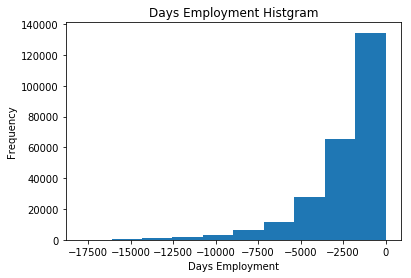

In [19]:
# Create an anomalous flag coumn
#異常フラグ列を生成する
app_train["DAYS_EMPLOYED_ANOM"] = app_train["DAYS_EMPLOYED"] ==365243

# Replace the anomalous values with nan
app_train["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace=True)

app_train["DAYS_EMPLOYED"].plot.hist(title="Days Employment Histgram");
plt.xlabel("Days Employment");

In [20]:
app_test["DAYS_EMPLOYED_ATOM"] = app_test["DAYS_EMPLOYED"] ==365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace=True)

print("There are %d anomalies in the test data out of %d entries" % (app_test["DAYS_EMPLOYED_ATOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


### Correlations 相関

In [21]:
# Find correlations with the target and sort
correlations = app_train.corr()["TARGET"].sort_values()

# Display correlations
print("Most Positive Correlations:\n", correlations.tail(15))
print("\nMost Negative Correlations:\n", correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

### Effect of Age on Repayment
### 返済に対する年齢の影響

In [22]:
# Find the correlation of the positive days since birth and target
app_train["DAYS_BIRTH"] = abs(app_train["DAYS_BIRTH"])
app_train["DAYS_BIRTH"].corr(app_train["TARGET"])

-0.07823930830982712

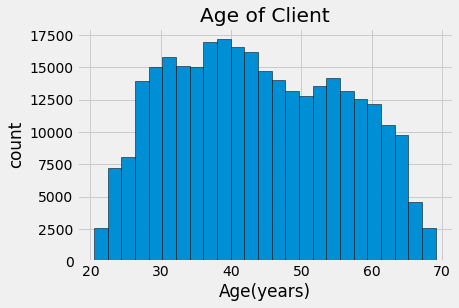

In [23]:
# Set the style of plots
plt.style.use("fivethirtyeight")

# Plot the distribution of ages in years
plt.hist(app_train["DAYS_BIRTH"] /365, edgecolor="k", bins=25)
plt.title("Age of Client"); plt.xlabel("Age(years)"); plt.ylabel("count");

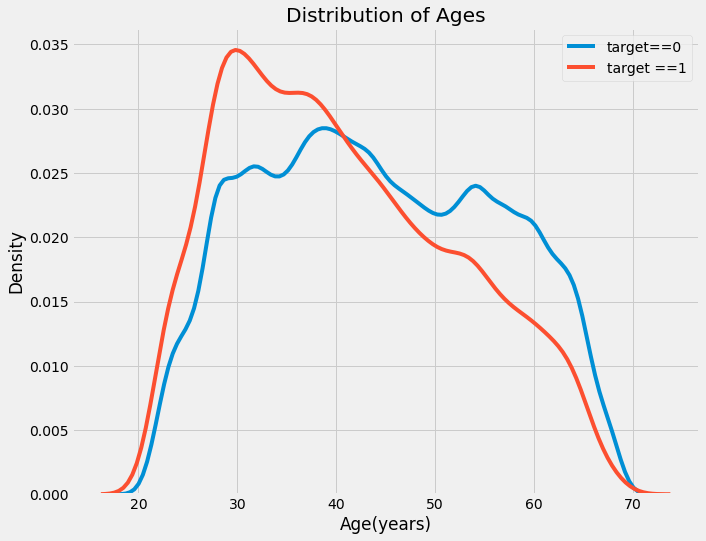

In [24]:
plt.figure(figsize=(10,8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train["TARGET"]==0, "DAYS_BIRTH"]/ 365, label="target==0")

# KDE plot of loans whichi were not repaid on time
sns.kdeplot(app_train.loc[app_train["TARGET"]==1, "DAYS_BIRTH"]/ 365, label="target ==1")

# labeling of plot
plt.xlabel("Age(years)"); plt.ylabel("Density"); plt.title("Distribution of Ages");

In [25]:
# Age information into a separate dataframe
age_data = app_train[["TARGET", "DAYS_BIRTH"]]
age_data["YEARS_BIRTH"] = age_data["DAYS_BIRTH"] /365

# Bin the age data
age_data["YEARS_BINNED"] = pd.cut(age_data["YEARS_BIRTH"], bins=np.linspace(20,70, num=11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [26]:
# Group by the bin and calulate averages
age_groups = age_data.groupby("YEARS_BINNED").mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5,1,'Failure to Repay by Age Group')

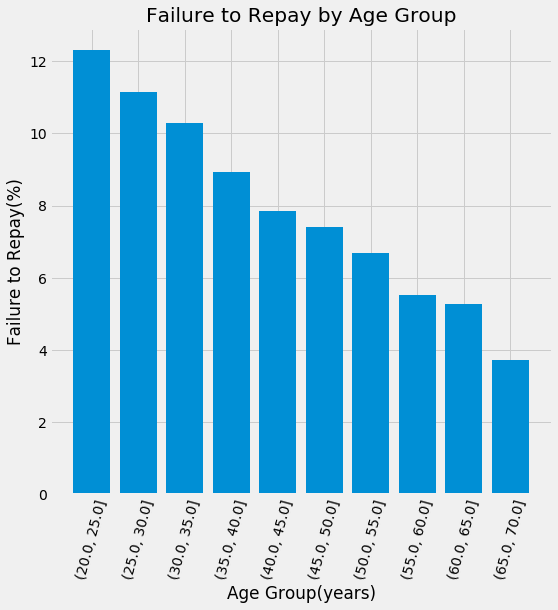

In [27]:
plt.figure(figsize=(8,8))

plt.bar(age_groups.index.astype(str), 100*age_groups["TARGET"])

plt.xticks(rotation=75); plt.xlabel("Age Group(years)")
plt.ylabel("Failure to Repay(%)")
plt.title("Failure to Repay by Age Group")

### Exterior Sources 外部ソース

In [28]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[["TARGET", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "DAYS_BIRTH"]]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


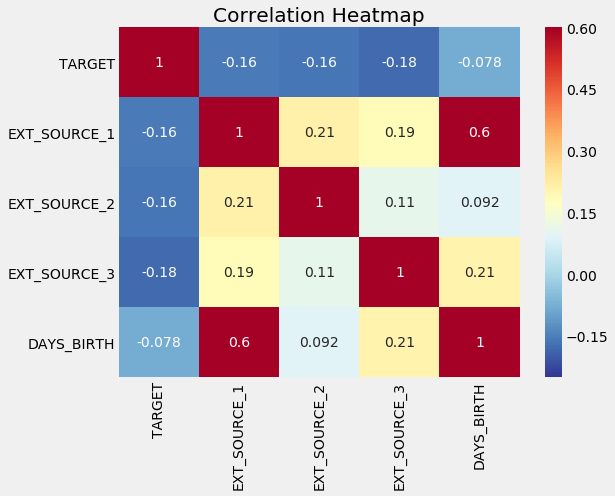

In [29]:
plt.figure(figsize=(8, 6))

# Haeamap of correlations
sns.heatmap(ext_data_corrs, cmap=plt.cm.RdYlBu_r, vmin=-0.25, annot=True, vmax=0.6)
plt.title("Correlation Heatmap");

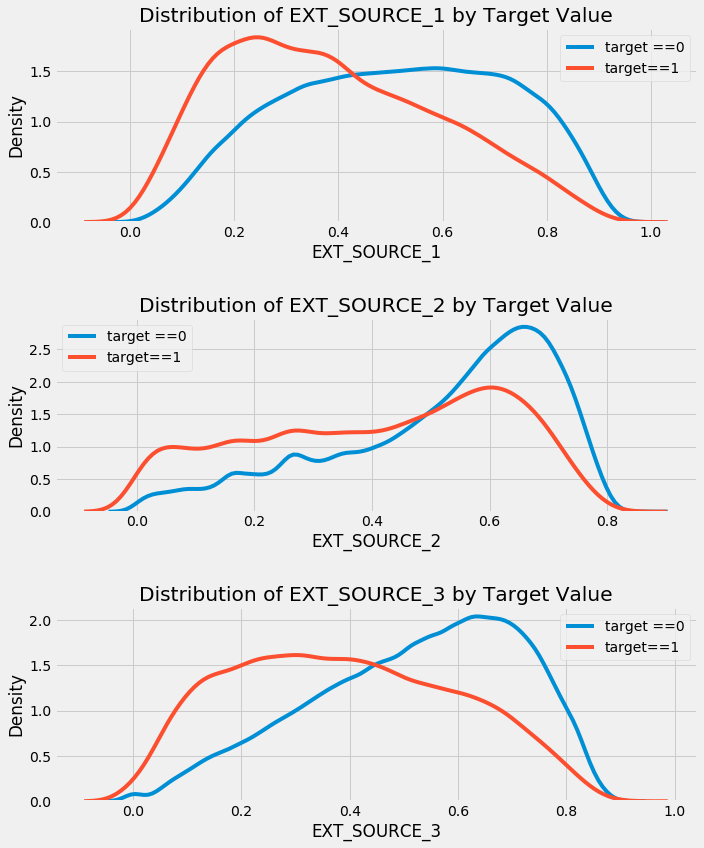

In [30]:
plt.figure(figsize=(10,12))

for i, source in enumerate(["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]):
    
    # create a new subplot for each source
    plt.subplot(3,1,i+1)
    
    #plot repaid loans
    sns.kdeplot(app_train.loc[app_train["TARGET"]==0, source], label="target ==0")
    
    #plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train["TARGET"]==1, source], label="target==1")
    
    # label the plots
    plt.title("Distribution of %s by Target Value" % source)
    plt.xlabel("%s" % source); plt.ylabel("Density")
    
    plt.tight_layout(h_pad=2.5)

### Pairs Plot
 Pairs Plotは、単一の変数の分布だけでなく、複数の変数ペア間の関係を見ることができるため、素晴らしい探索ツールです。 

/Users/tsuneo/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


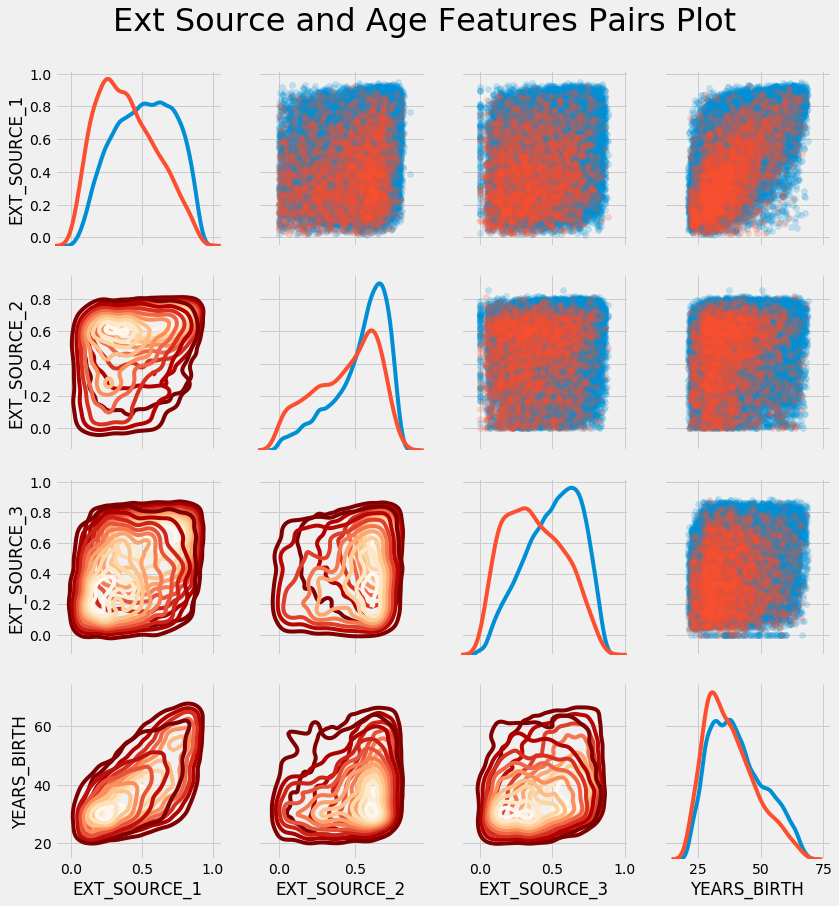

In [31]:
# Copy the data for plotting
plot_data = ext_data.drop(columns =["DAYS_BIRTH"]).copy()

plot_data["YEARS_BIRTH"] = age_data["YEARS_BIRTH"]

plot_data = plot_data.dropna().loc[:100000,:]

def crr_func(x, y, **kwargs):
    r = np.corrcoef(x,y)[0][1]
    ax = plt.gca()
    ax.annotate("r={:.2f}".format(r),
               xy=(.2, .8), xycoords=ax.transAxes,
               size=20)
    
grid = sns.PairGrid(data=plot_data, size=3, diag_sharey=False,
                   hue="TARGET",
                   vars = [x for x in list(plot_data.columns) if x != "TARGET"])

grid.map_upper(plt.scatter, alpha=0.2)

grid.map_diag(sns.kdeplot)

grid.map_lower(sns.kdeplot, cmap=plt.cm.OrRd_r);

plt.suptitle("Ext Source and Age Features Pairs Plot", size=32, y=1.05);
    

### Feature Engineering　特徴エンジニアリング
データから特徴を作成する

### Polynomial Features  多項式の特徴

In [32]:
poly_features = app_train[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "DAYS_BIRTH", "TARGET"]]
poly_features_test = app_test[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "DAYS_BIRTH"]]

# Inputerで欠損値の置き換え
# Preprocessing においてのImputerは欠損値を mean（平均）, median（中央値）,
# mode（最頻値）のどれかに置き換えることができます。
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = "median")

poly_target = poly_features["TARGET"]

poly_features = poly_features.drop(columns = ["TARGET"])

poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree=3)



In [33]:
poly_transformer.fit(poly_features)

poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print("Polynomial Features shape: ", poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [34]:
poly_transformer.get_feature_names(input_features = ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "DAYS_BIRTH"])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [35]:
poly_features = pd.DataFrame(poly_features, columns=poly_transformer.get_feature_names(["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "DAYS_BIRTH"]))

# add in the target
poly_features["TARGET"] = poly_target

poly_corrs = poly_features.corr()["TARGET"].sort_values()

print(poly_corrs.head(10))
print(poly_corrs.tail(10))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
EXT_SOURCE_1                -0.098887
EXT_SOURCE_1^2 DAYS_BIRTH   -0.097507
EXT_SOURCE_1 DAYS_BIRTH^2   -0.094913
EXT_SOURCE_1^2              -0.091034
EXT_SOURCE_1^3              -0.083005
DAYS_BIRTH                  -0.078239
DAYS_BIRTH^2                -0.076672
DAYS_BIRTH^3                -0.074273
TARGET                       1.000000
1                                 NaN
Name: TARGET, dtype: float64


In [36]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, columns=poly_transformer.get_feature_names(["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "DAYS_BIRTH"]))

# Merge polynomial features into training dataframe
poly_features["SK_ID_CURR"] = app_train["SK_ID_CURR"]
app_train_poly = app_train.merge(poly_features, on="SK_ID_CURR", how="left")

# Merge polnomial features into testing dataframe
poly_features_test["SK_ID_CURR"]= app_test["SK_ID_CURR"]
app_test_poly = app_test.merge(poly_features_test, on ="SK_ID_CURR", how="left")

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join="inner", axis=1)

# Print out the new shapes
print("Training data with polynomial features shape:", app_train_poly.shape)
print("Testing data with polynomial features shape:", app_test_poly.shape)


Training data with polynomial features shape: (307511, 274)
Testing data with polynomial features shape: (48744, 274)


### Domain Knowledge Features
### ドメイン知識の特徴量

In [37]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain["CREDIT_INCOM_PERCENT"] = app_train_domain["AMT_CREDIT"]/ app_train_domain["AMT_INCOME_TOTAL"]
app_train_domain["ANNUITY_INCOME_PERCENT"] = app_train_domain["AMT_ANNUITY"] / app_train_domain["AMT_INCOME_TOTAL"]
app_train_domain["CREDIT_TERM"] = app_train_domain["AMT_ANNUITY"] / app_train_domain["AMT_CREDIT"]
app_train_domain["DAYS_EMPLOYED_PERCENT"] = app_train_domain["DAYS_EMPLOYED"] / app_train_domain["DAYS_BIRTH"]

In [38]:
app_test_domain["CREDIT_INCOM_PERCENT"] = app_test_domain["AMT_CREDIT"]/ app_test_domain["AMT_INCOME_TOTAL"]
app_test_domain["ANNUITY_INCOME_PERCENT"] = app_test_domain["AMT_ANNUITY"] / app_test_domain["AMT_INCOME_TOTAL"]
app_test_domain["CREDIT_TERM"] = app_test_domain["AMT_ANNUITY"] / app_test_domain["AMT_CREDIT"]
app_test_domain["DAYS_EMPLOYED_PERCENT"] = app_test_domain["DAYS_EMPLOYED"] / app_test_domain["DAYS_BIRTH"]

### Visualize New Variables
新しい変数を描画する

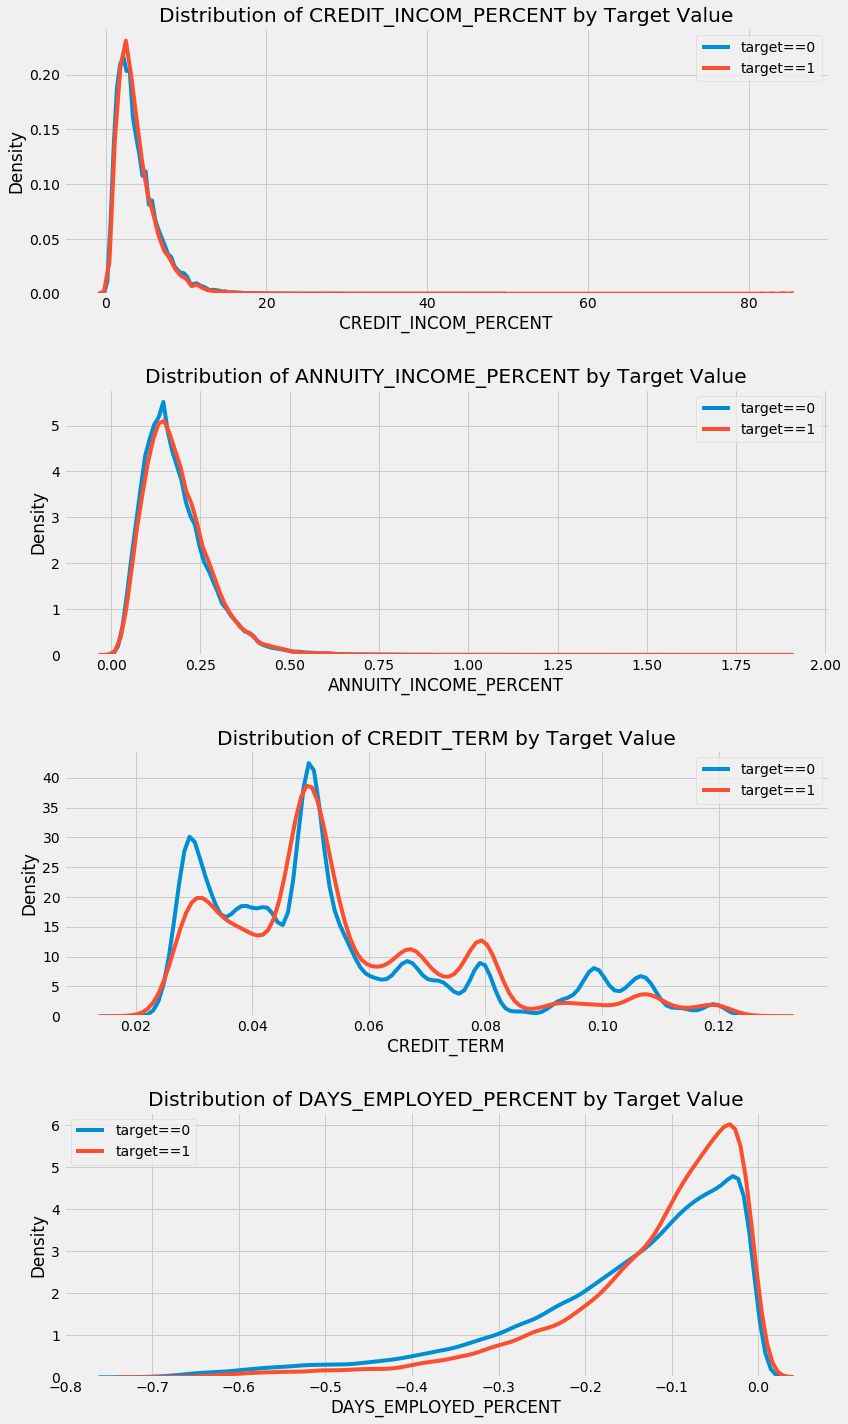

In [39]:
plt.figure(figsize=(12,20))

for i, feature in enumerate(["CREDIT_INCOM_PERCENT", "ANNUITY_INCOME_PERCENT", "CREDIT_TERM", "DAYS_EMPLOYED_PERCENT"]):
    
    #create a new subplot for each source
    plt.subplot(4,1,i+1)
    #plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain["TARGET"]==0, feature], label="target==0")
    
    #plot loans that were not rapaid
    sns.kdeplot(app_train_domain.loc[app_train_domain["TARGET"]==1, feature], label="target==1")
    
    # label the plots
    plt.title("Distribution of %s by Target Value" % feature)
    plt.xlabel("%s" % feature); plt.ylabel("Density");
    
plt.tight_layout(h_pad=2.5)

### Baseline 基準

### Logistic Regression Implementation
ロジスティック回帰の実装

In [40]:
# MinMaxScalerは正規化のモジュール
# データが0~1に入るよう変換
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if "TARGET" in app_train:
    train = app_train.drop(columns=["TARGET"])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = "median")

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler 
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print("Training data shape: ", train.shape)
print("Testing data shape: ", test.shape)
    

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


In [41]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)


LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [42]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [43]:
# Submission dataframe
submit = app_test[["SK_ID_CURR"]]
submit["TARGET"] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.087750
1,100005,0.163957
2,100013,0.110238
3,100028,0.076575
4,100038,0.154924


In [44]:
# Save the submission to a csv file
submit.to_csv("log_reg_baseline.csv", index = False)

## Improved Model: Random Forest
改善されたモデル：ランダムフォレスト

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose=1,n_jobs = -1)

In [46]:
# Train on the training data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({"feature":features, "importance":feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished


In [47]:
# Make a sumission dataframe
submit = app_test[["SK_ID_CURR"]]
submit["TARGET"] = predictions

# Samve the submission dataframe
submit.to_csv("random_forest_baseline.csv", index=False)

## Make Predictions using Engineered Features
設計された機能を使用して予測を行う

In [48]:
poly_features_names = list(app_train_poly.columns)

# Impute the polynomial features
imputer = Imputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_train_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range=(0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state =50, verbose = 1, n_jobs = -1)

In [49]:
# Train on the training data
random_forest_poly.fit(poly_features, train_labels)

# Make predictions on the test data
predictions = random_forest_poly.predict_proba(poly_features_test)[:, -1]

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   43.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    5.4s finished


# Testing Domain Features
ドメイン特徴量のテスト

In [50]:
app_train_domain = app_train_domain.drop(columns='TARGET')

domain_features_names = list(app_train_domain.columns)

#Impute the domainnomail features
imputer = Imputer(strategy = 'median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest_domain.fit(domain_features, train_labels)

# Extract feature importances
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature':domain_features_names, 'importance':feature_importance_values_domain})

# Make predictions on the test data
predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished


In [51]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_domain.csv', index= False)

# Model Interpretation: Feature Importances
モデルの解説：特徴量の重要性

In [52]:
def plot_feature_importances(df):
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending=False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    
    # Make a horizontal bar chart of feature importances
    plt.figure(figsize=(10,6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most importanct on top
    ax.barh(list(reversed(list(df.index[:15]))),
           df['importance_normalized'].head(15),
            align='center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

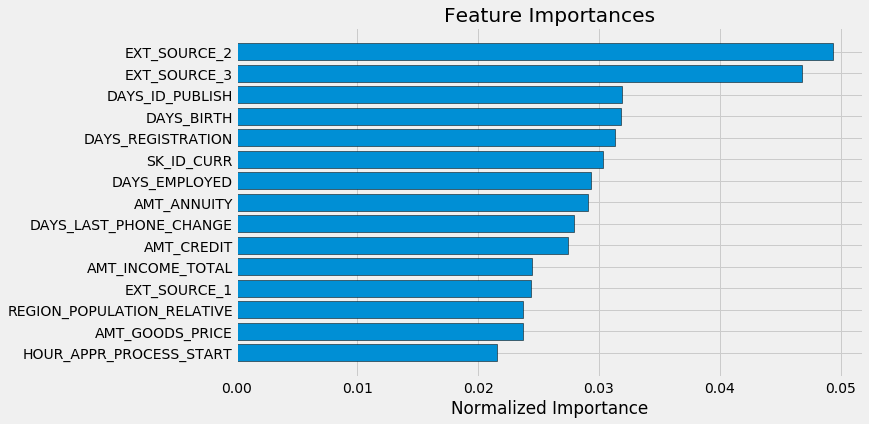

In [53]:
# Show the feature importances for the default featrues
feature_importances_sorted = plot_feature_importances(feature_importances)

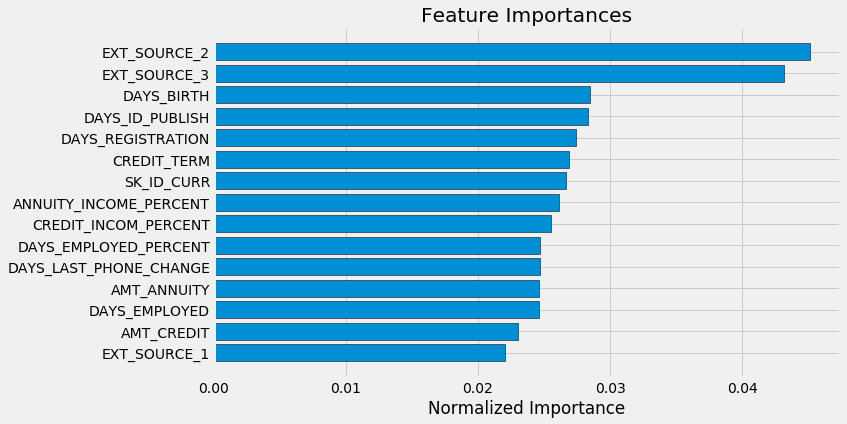

In [54]:
feature_importances_domain_sorted = plot_feature_importances(feature_importances_domain)

# Conclusions
# 結果

## Just for Fun: Light Gradient Boosting Machine
ちょっと楽しもう：ＬＧＢＭ

In [55]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds = 5):
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training 
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    # One Hot Encodint
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis=1)
        
        # No categorical indices to record
        cat_indices = 'auto'
        
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1)))
                
                # Record the categorical indices
                cat_indices = []
                
                # Iterate through each column
                for i, col in enumerate(features):
                    if features[col].dtype == 'object':
                        # map the categorical features to integers
                        features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                        test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))
                        
                        # Record the categorical indices
                        cat_indices.append(i)
                        
    else:
        raise ValueError("Encoding must be either 'ohe', or 'le'")
    
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extranct feature name
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the khold object
    k_fold = KFold(n_splits = n_folds, shuffle = True , random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold valication predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # List for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators =10000, objective = 'binary',
                                  class_weight='balanced', learning_rage=0.05,
                                  reg_alpha=0.1, reg_lambda=0.1,
                                  subsample=0.8, n_jobs = -1, random_state=50)
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                 eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                 eval_names = ['valid', 'train'], categorical_feature = cat_indices, early_stopping_rounds = 100, verbose=200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature imprtances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # make predictions
        test_predictions += model.predict_proba(test_features, num_iteration=best_iteration)[:, 1]/ k_fold.n_splits
        
        # Record the out of hold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR':test_ids, 'TARGET':test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature':feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall socres to the metrices
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation socres
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold':fold_names,
                           'train':train_scores,
                           'valid':valid_scores})
    
    return submission, feature_importances, metrics
        

/Users/tsuneo/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [56]:
submission , fi, metrics = model(app_train, app_test)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (307511, 238)
Testing Data Shape:  (48744, 238)
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.754185	valid's binary_logloss: 0.545842	train's auc: 0.827543	train's binary_logloss: 0.526659
Early stopping, best iteration is:
[144]	valid's auc: 0.754865	valid's binary_logloss: 0.555482	train's auc: 0.811673	train's binary_logloss: 0.54115
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.756995	valid's binary_logloss: 0.546517	train's auc: 0.82753	train's binary_logloss: 0.527161
Early stopping, best iteration is:
[106]	valid's auc: 0.757985	valid's binary_logloss: 0.562998	train's auc: 0.800064	train's binary_logloss: 0.551933
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.761896	valid's binary_logloss: 0.546929	train's auc: 0.827378	train's binary_logloss: 0.527726
Early stopping, best iteration is:
[212]	valid's auc: 0.762091	valid's binary_logloss: 0.5446

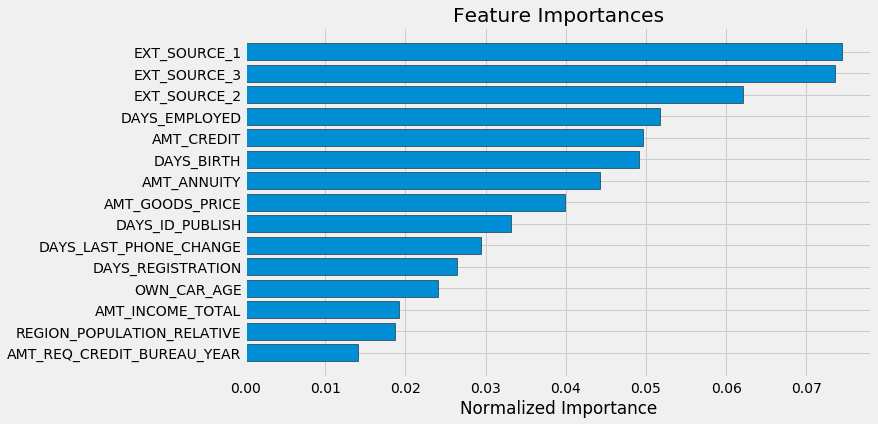

In [57]:
# fi_sorted = plot_feature_importances(fi)
fi_sorted = plot_feature_importances(fi)

In [58]:
submission.to_csv('baseline_lgb.csv', index = False)

In [59]:
app_train_domain['TARGET'] = train_labels

# Test the domain knolwedge features
submission_domain, fi_domain, metrics_domain = model(app_train_domain, app_test_domain)
print('Baseline with domain knowledge features metrices')
print(metrics_domain)

Training Data Shape:  (307511, 242)
Testing Data Shape:  (48744, 242)
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.761673	valid's binary_logloss: 0.539708	train's auc: 0.832954	train's binary_logloss: 0.520685
Early stopping, best iteration is:
[130]	valid's auc: 0.762678	valid's binary_logloss: 0.55197	train's auc: 0.812836	train's binary_logloss: 0.539371
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[95]	valid's auc: 0.765495	valid's binary_logloss: 0.559162	train's auc: 0.802018	train's binary_logloss: 0.549379
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.768933	valid's binary_logloss: 0.539548	train's auc: 0.833224	train's binary_logloss: 0.521341
Early stopping, best iteration is:
[129]	valid's auc: 0.769931	valid's binary_logloss: 0.552408	train's auc: 0.812548	train's binary_logloss: 0.540314
Training until validation scores don't improve for 100 rou

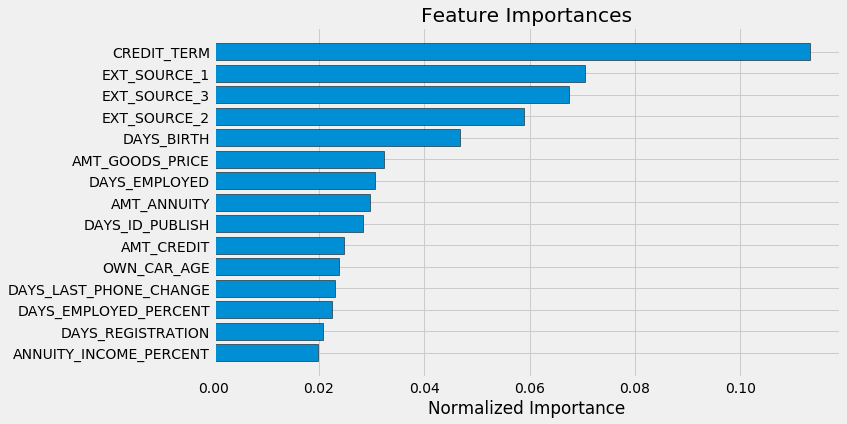

In [60]:
fi_sorted = plot_feature_importances(fi_domain)

In [61]:
submission_domain.to_csv('baseline_lgb_domain_features.csv', index=False)